In [1]:
import os

directory_path = '/Users/drishttinarwal/Documents/Forex-market-analysis-main/datasets/eurusd'
contents = os.listdir(directory_path)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"/Users/drishttinarwal/Documents/Forex-market-analysis-main/datasets/eurusd/eurusd_m30.csv")

In [4]:
df

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume
0,0,2012-01-02 00:00:00,1.29443,1.29525,1.29419,1.29419,569,19,0
1,1,2012-01-02 00:30:00,1.29406,1.29488,1.29368,1.29429,646,21,0
2,2,2012-01-02 01:00:00,1.29434,1.29486,1.29315,1.29413,435,20,0
3,3,2012-01-02 01:30:00,1.29409,1.29482,1.29386,1.29410,349,20,0
4,4,2012-01-02 02:00:00,1.29418,1.29471,1.29383,1.29422,451,22,0
...,...,...,...,...,...,...,...,...,...
123676,123676,2021-12-30 22:00:00,1.13271,1.13303,1.13237,1.13244,564,0,0
123677,123677,2021-12-30 22:30:00,1.13244,1.13245,1.13184,1.13193,505,0,0
123678,123678,2021-12-30 23:00:00,1.13194,1.13275,1.13194,1.13269,294,0,0
123679,123679,2021-12-30 23:30:00,1.13270,1.13276,1.13240,1.13257,233,0,0


In [5]:
del df['Unnamed: 0']

In [6]:
df

,time,open,high,low,close,tick_volume,spread,real_volume
0,2012-01-02 00:00:00,1.29443,1.29525,1.29419,1.29419,569,19,0
1,2012-01-02 00:30:00,1.29406,1.29488,1.29368,1.29429,646,21,0
2,2012-01-02 01:00:00,1.29434,1.29486,1.29315,1.29413,435,20,0
3,2012-01-02 01:30:00,1.29409,1.29482,1.29386,1.29410,349,20,0
4,2012-01-02 02:00:00,1.29418,1.29471,1.29383,1.29422,451,22,0
...,...,...,...,...,...,...,...,...
123676,2021-12-30 22:00:00,1.13271,1.13303,1.13237,1.13244,564,0,0
123677,2021-12-30 22:30:00,1.13244,1.13245,1.13184,1.13193,505,0,0
123678,2021-12-30 23:00:00,1.13194,1.13275,1.13194,1.13269,294,0,0
123679,2021-12-30 23:30:00,1.13270,1.13276,1.13240,1.13257,233,0,0


In [7]:
df['SMA10'] = df['close'].rolling(10).mean()
df['SMA20'] = df['close'].rolling(20).mean()

In [8]:
df.isna().sum()

time            0
open            0
high            0
low             0
close           0
tick_volume     0
spread          0
real_volume     0
SMA10           9
SMA20          19
dtype: int64

In [9]:
df['SMA10'].head(20)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     1.293720
10    1.293575
11    1.293364
12    1.293279
13    1.293169
14    1.293038
15    1.292955
16    1.293033
17    1.293106
18    1.293278
19    1.293424
Name: SMA10, dtype: float64

In [10]:
df['SMA20'].head(30)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19    1.293572
20    1.293646
21    1.293708
22    1.293749
23    1.293770
24    1.293792
25    1.293845
26    1.293877
27    1.293910
28    1.293944
29    1.293951
Name: SMA20, dtype: float64

In [11]:
df.dropna()

,time,open,high,low,close,tick_volume,spread,real_volume,SMA10,SMA20
19,2012-01-02 09:30:00,1.29496,1.29507,1.29401,1.29401,1401,10,0,1.293424,1.293572
20,2012-01-02 10:00:00,1.29400,1.29681,1.29382,1.29567,2012,13,0,1.293717,1.293646
21,2012-01-02 10:30:00,1.29568,1.29596,1.29481,1.29553,1312,10,0,1.294052,1.293708
22,2012-01-02 11:00:00,1.29552,1.29611,1.29473,1.29495,1176,11,0,1.294219,1.293749
23,2012-01-02 11:30:00,1.29494,1.29509,1.29358,1.29452,1481,12,0,1.294371,1.293770
...,...,...,...,...,...,...,...,...,...,...
123676,2021-12-30 22:00:00,1.13271,1.13303,1.13237,1.13244,564,0,0,1.131769,1.132157
123677,2021-12-30 22:30:00,1.13244,1.13245,1.13184,1.13193,505,0,0,1.131655,1.132171
123678,2021-12-30 23:00:00,1.13194,1.13275,1.13194,1.13269,294,0,0,1.131674,1.132187
123679,2021-12-30 23:30:00,1.13270,1.13276,1.13240,1.13257,233,0,0,1.131763,1.132186


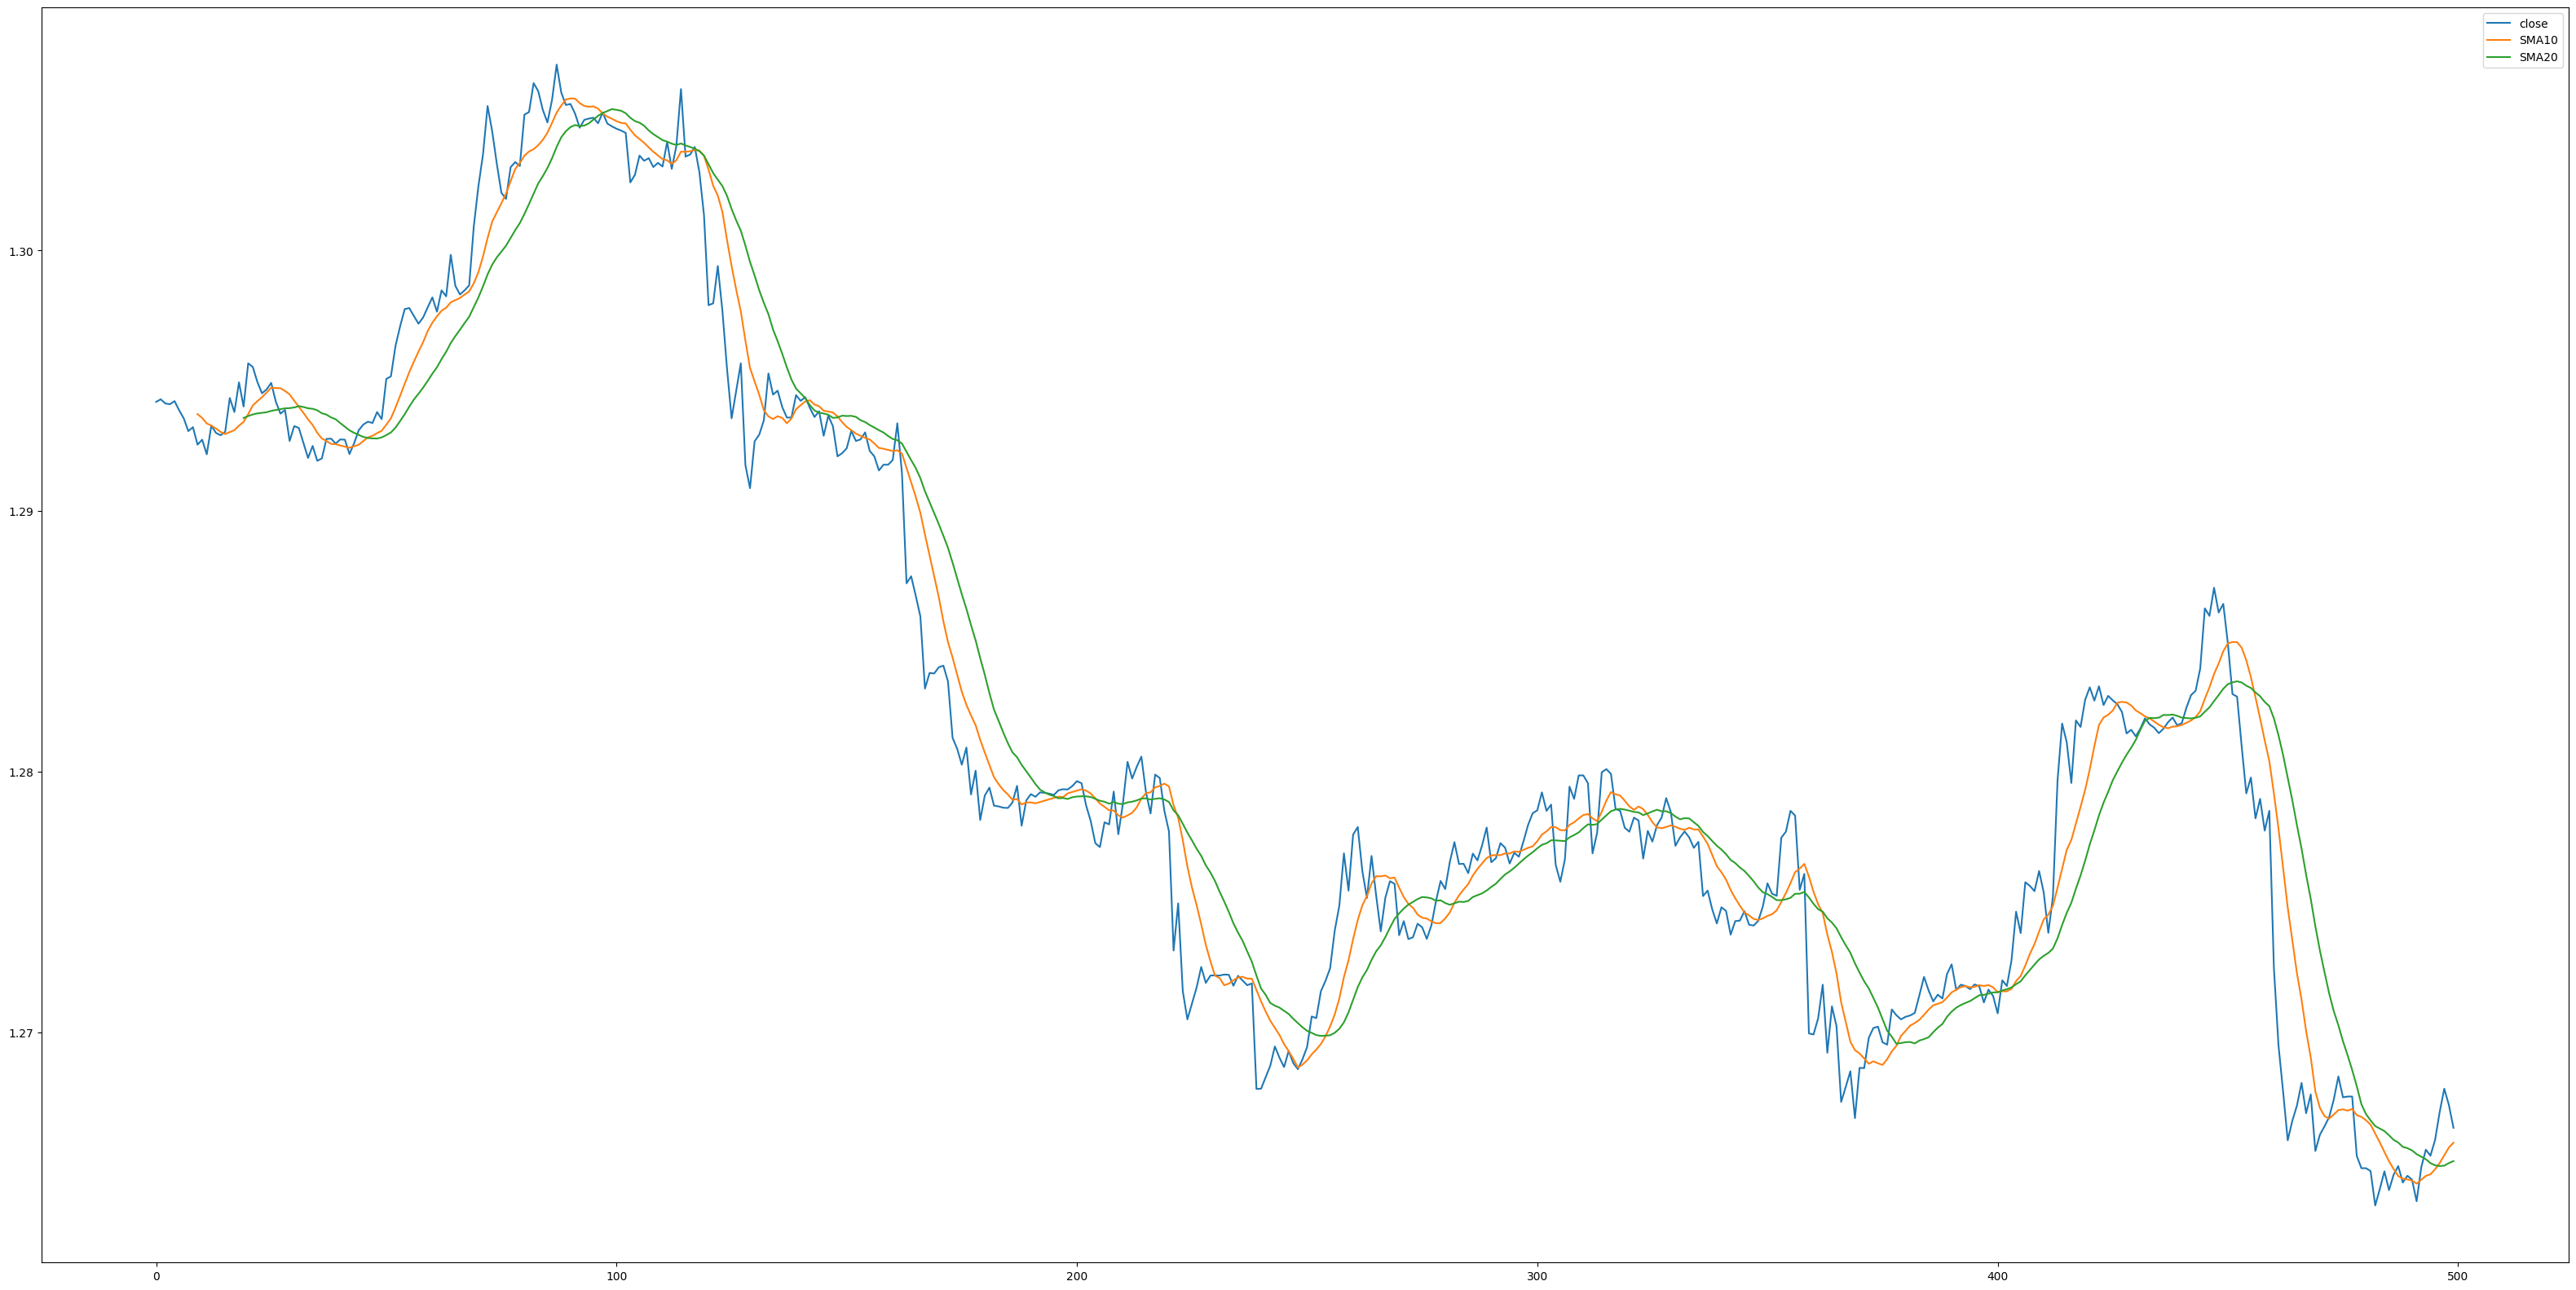

In [12]:
df[['close','SMA10','SMA20']].head(500).plot(figsize=(40,20))
plt.show()